In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 1000)
import seaborn as sns
import unidecode

In [142]:
#Lendo dados
drogas_entrada = pd.read_csv('Dados/GESEG_SBX_DROGA_EXPORT.csv', encoding = 'latin-1', sep = ';', index_col=0)
drogas_entrada.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_OBJETO,NRO_INT_TIPO_OBJETO,TIPO_OBJETO,QUANTIDADE,ATRIBUTO
ORGAO_OCOR,,,,,,,
100829,2021,1137,23703381,756,Cocaína,Grama,Unidade de Peso
151321,2020,1129,22817480,5,Maconha,Grama,Unidade de Peso
150808,2020,15392,23048116,5,Maconha,Verde,Cor Predominante
100510,2020,16612,23076594,756,Cocaína,4 pinos de cocaína pesando aproximadamente o t...,Descrição
151008,2019,2462,20497307,1025,Drogas,1,Quantidade de Unidade(s)
151008,2019,2462,20497307,1025,Drogas,Porção(es),Tipo de Embalagem
150808,2019,20501,21804599,5,Maconha,Verde,Cor Predominante
152308,2020,5394,23251372,1025,Drogas,01,Quantidade de Unidade(s)
151707,2019,4116,21639890,5,Maconha,Verde,Cor Predominante


In [143]:
#Pivotando valor "QUANTIDADE" da coluna "ATRIBUTOS" com o mesmo "NRO_INT_OBJETO"
drogas_pivotado = drogas_entrada.pivot(index="NRO_INT_OBJETO", columns="ATRIBUTO", values="QUANTIDADE")
drogas_pivotado.head()

ATRIBUTO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
NRO_INT_OBJETO,,,,,,,
11228824,Amarelo,NaN,"0,42",NaN,4,Não soube informar,NaN
19338359,Verde,NaN,"2,20",NaN,1,Tijolo(s),Grama
19344958,Verde,NaN,"14,20",NaN,2,Porção(es),Grama
19352770,Branco,NaN,"0,80",NaN,1,Porção(es),Grama
19352780,Verde,NaN,"1,60",NaN,1,Cigarro(s),Grama


In [144]:
#Agrupando restante dos dados não pivotados pelo mesmo "NRO_INT_OBJETO"
drogas_agrupado = drogas_entrada[['NRO_INT_OBJETO','ANO_OCOR', 'NRO_OCOR','NRO_INT_TIPO_OBJETO','TIPO_OBJETO']].groupby(["NRO_INT_OBJETO"]).min()
drogas_agrupado.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TIPO_OBJETO
NRO_INT_OBJETO,,,,
11228824,2009,3209,1025,Drogas
19338359,2018,3315,5,Maconha
19344958,2018,3319,5,Maconha
19352770,2018,3139,756,Cocaína
19352780,2018,3143,5,Maconha
19352781,2018,3143,5,Maconha
19359630,2018,2674,5,Maconha
19359634,2018,2675,5,Maconha
19359637,2018,2676,5,Maconha


In [145]:
#Ordena por "NRO_INT_OBJETO" paraa concatenar de forma simples e rápida
drogas_agrupado_sorted = drogas_agrupado.sort_values(by=['NRO_INT_OBJETO'])
drogas_pivotado_sorted = drogas_pivotado.sort_values(by=['NRO_INT_OBJETO'])
#Garantia de mesmo numero de linhas para concatenação
display(drogas_agrupado_sorted.shape, drogas_pivotado_sorted.shape)
if drogas_agrupado_sorted.shape[0] != drogas_pivotado_sorted.shape[0]:
    display("ATENÇÃO: QTDE de registros diferentes, houve algum problema nos passos anteriores.")

(113231, 4)

(113231, 7)

In [146]:
#Concatenando as duas tabelas e refaz o índice numérico
drogas_df = pd.concat([drogas_agrupado_sorted, drogas_pivotado_sorted],axis=1).reset_index()
#Renomeando Coluans
drogas_df = drogas_df.rename(columns={"NRO_INT_OBJETO": "CHAVE_OBJETO", "TIPO_OBJETO": "TXT_TIPO_OBJETO"})
#Mostrando o resultado com descrição não nula
drogas_df[drogas_df['Descrição'].notnull()].head(5)

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso
216,19903084,2018,4727,5,Maconha,Verde,"maconha prensada embalada em plastico, 5 gr","5,00","5,00",1,Pacote(s),Grama
217,19903086,2018,4727,5,Maconha,Verde,"maconha prensada embalada em plastico, 1,4 gr","1,40","1,40",1,Pacote(s),Grama
218,19903569,2018,6732,5,Maconha,Verde,Um porção de erva esverdeada semelhante a maco...,"2,40","2,40",1,Porção(es),Grama
219,19903819,2018,30412,5,Maconha,Verde,DOIS GRAMAS DE SUBSTANCIA ESVERDEADA DE ASPECT...,"2,00",NaN,3,Porção(es),Grama
220,19903932,2018,8070,1025,Drogas,Verde,uma pequena porção de erva de cor esverdeada s...,NaN,NaN,1,Porção(es),Miligrama


# <h1><center>TIPO DE OBJETO</center></h1>

In [147]:
#Confere frequencia de cada categoria
freq_tipo = drogas_df.groupby(["TXT_TIPO_OBJETO"]).size().reset_index(name="Quantidade").set_index("TXT_TIPO_OBJETO").sort_index()
freq_tipo['Frequência'] = drogas_df['TXT_TIPO_OBJETO'].value_counts(normalize=True).sort_index().round(6).astype(str)
freq_tipo.T

TXT_TIPO_OBJETO,Cocaína,Crack,Drogas,Maconha
Quantidade,20063,14476,37528,41164
Frequência,0.177186,0.127845,0.331429,0.36354


In [148]:
#Código Original copiado
cores = pd.DataFrame(drogas_df['TXT_TIPO_OBJETO'].value_counts())
cores = cores.reset_index()
cores = cores.T
cores = cores.rename(columns={0:cores[0][0],1:cores[1][0],2:cores[2][0],3:cores[3][0]})
cores = cores.iloc[1:]
cores1 = drogas_df['TXT_TIPO_OBJETO'].value_counts(normalize=True)
cores1 = pd.DataFrame(cores1)
cores1 = cores1.reset_index()
cores1 = cores1.T
cores1 = cores1.rename(columns={0:cores1[0][0],1:cores1[1][0],2:cores1[2][0],3:cores1[3][0][0]})
lista = [cores,cores1]
cores2 = pd.concat(lista)
cores2 = cores2.reset_index(drop=True)
cores2 = cores2.drop([1], axis = 0)
cores2 = cores2.rename(index={0:'Quantidade', 2:"%"})
cores2['Crack']['%'] = cores2['C']['%']
cores2 = cores2.drop(['C'], axis = 1)
cores2[['Cocaína', 'Crack', 'Drogas', 'Maconha']].head()

,Cocaína,Crack,Drogas,Maconha
Quantidade,20063,14476,37528,41164
%,0.177186,0.127845,0.331429,0.36354


In [149]:
#Monta serie de drogas para reclassificação
DrogasReclassificar = drogas_df.loc[drogas_df['TXT_TIPO_OBJETO'] == 'Drogas'].reset_index(drop=True)
#Salvando drogas ja já classificadas
JaClassificadas = drogas_df.loc[drogas_df['TXT_TIPO_OBJETO'] != 'Drogas'].reset_index(drop= True)

def unicode_e_minusculo(txt):
    if pd.isna(txt):
        return pd.NA
    return unidecode.unidecode(str(txt).replace(',','').replace('.','')).lower()
DrogasReclassificar['Descrição'] = DrogasReclassificar['Descrição'].apply(unicode_e_minusculo)

In [150]:
#Tratando ajustes de drogas
def analizer(x):
    if pd.isna(x):
        return 'Drogas'
    if 'maconha' in x:
        return 'Maconha'
    elif 'canabis' in x:
        return 'Maconha'
    elif 'cannabis' in x:
        return 'Maconha'
    elif 'crack' in x:
        return 'Crack'
    elif 'cocaina' in x:
        return 'Cocaína'
    else:
        return 'Drogas'

DrogasReclassificar['RECLASSIFICAÇÃO'] = DrogasReclassificar['Descrição'].apply(analizer)

In [151]:
#Junta novamente com as drogas já classificadas e seta a reclassificacao para o dado anterior
reclassificacao = pd.concat([DrogasReclassificar, JaClassificadas])
reclassificacao['RECLASSIFICAÇÃO'] = reclassificacao['RECLASSIFICAÇÃO'].fillna(value=reclassificacao.TXT_TIPO_OBJETO)

In [152]:
freq_reclassificada = reclassificacao.groupby(['RECLASSIFICAÇÃO']).size().reset_index(name="Quantidade").set_index('RECLASSIFICAÇÃO').sort_index()
freq_reclassificada['Frequência'] = reclassificacao['RECLASSIFICAÇÃO'].value_counts(normalize=True).sort_index().round(6).astype(str)
display(freq_tipo.T)
display(freq_reclassificada.T)

TXT_TIPO_OBJETO,Cocaína,Crack,Drogas,Maconha
Quantidade,20063,14476,37528,41164
Frequência,0.177186,0.127845,0.331429,0.36354


RECLASSIFICAÇÃO,Cocaína,Crack,Drogas,Maconha
Quantidade,28062,20282,6013,58874
Frequência,0.24783,0.179121,0.053104,0.519946


In [153]:
def plota_grafico(df, campo_x):
    palette ={"Maconha": "green", "Cocaína": "white", "Crack": "yellow", "Drogas": "blue"}
    f, (ax3) = plt.subplots(1, 1, figsize=(14, 5))
    sns.set(font_scale=1.5)
    sns.countplot(x=campo_x, data=df, ax=ax3, palette= palette, alpha = 0.7, linewidth=2.5, edgecolor=".0")
    ax3.set_facecolor('#ababab')
    ax3.patch.set_alpha(0.3)
    ax3.set_xlabel("Tipo de Objeto",fontsize=20)
    ax3.set_ylabel("Quantidade",fontsize=20)
    ax3.set_xticklabels(ax3.get_xmajorticklabels(), fontsize = 15)
    plt.grid(axis='x')
    plt.tight_layout()

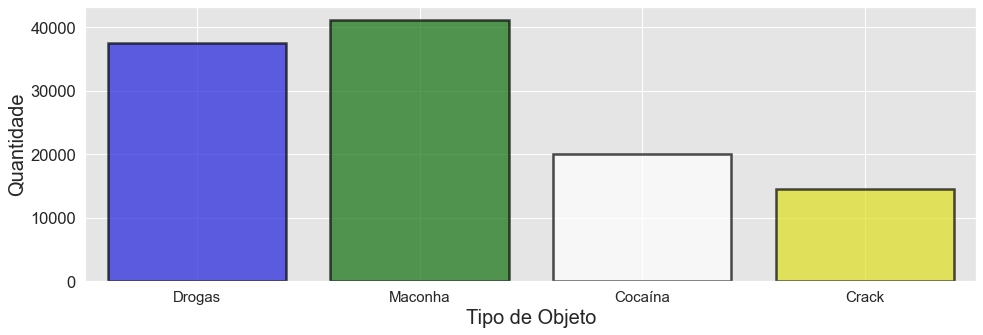

In [154]:
plota_grafico(drogas_df, "TXT_TIPO_OBJETO")

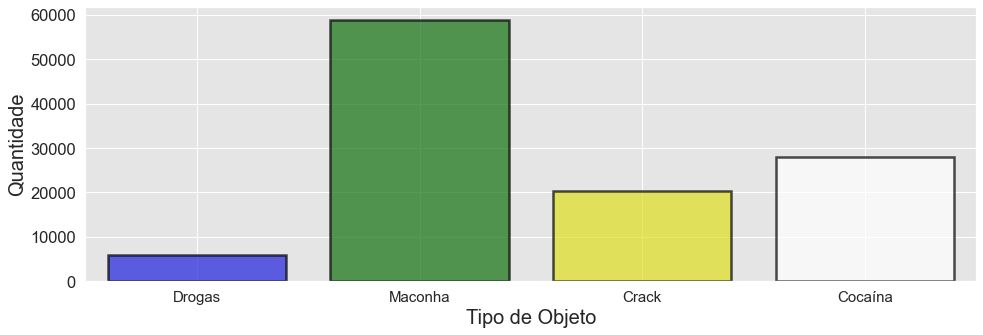

In [155]:
#Plotando Reclassificado
plota_grafico(reclassificacao, "RECLASSIFICAÇÃO")

## Iniciando tratamento de PESOS

In [156]:
#Mudando o float do padrão brasileiro para o americano
#Criando novas colunas de Peso para analise e diferenciação de valores entre nova e antiga
reclassificacao['Novo Peso Unitário'] = pd.to_numeric(reclassificacao['Peso Unitário'].str.replace(',','.'), errors='coerce',downcast="float")
reclassificacao['Novo Peso Total'] = pd.to_numeric(reclassificacao['Peso Total'].str.replace(',','.'), errors='coerce',downcast="float")

#Trocando dados NaN por 0
reclassificacao['Novo Peso Unitário'] = reclassificacao['Novo Peso Unitário'].fillna(0).astype(float)
reclassificacao['Novo Peso Total'] = reclassificacao['Novo Peso Total'].fillna(0).astype(float)
#Mostrar mudança nas colunas peso
reclassificacao.head(10)

,CHAVE_OBJETO,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,RECLASSIFICAÇÃO,Novo Peso Unitário,Novo Peso Total
0,11228824,2009,3209,1025,Drogas,Amarelo,<NA>,"0,42",NaN,4,Não soube informar,NaN,Drogas,0.0,0.420000
1,19443979,2018,1191,1025,Drogas,Verde,<NA>,"14,34",NaN,2,Porção(es),Grama,Drogas,0.0,14.340000
2,19443985,2018,1191,1025,Drogas,Amarelo,<NA>,"2,74",NaN,26,Unidade(s),Grama,Drogas,0.0,2.740000
3,19444713,2018,1191,1025,Drogas,Verde,<NA>,"5,00",NaN,2,Porção(es),Grama,Drogas,0.0,5.000000
4,19444722,2018,1191,1025,Drogas,Branco,<NA>,"1,50",NaN,3,Cigarro(s),Grama,Drogas,0.0,1.500000
5,19449101,2018,3449,1025,Drogas,Verde,<NA>,"112,05",34,3,Porção(es),Grama,Drogas,34.0,112.050003
6,19478366,2018,4293,1025,Drogas,Verde,<NA>,"2,80",NaN,1,Porção(es),Grama,Drogas,0.0,2.800000
7,19481385,2018,4027,1025,Drogas,Verde,<NA>,NaN,15,1,Pacote(s),Grama,Drogas,15.0,0.000000
8,19510027,2018,388,1025,Drogas,Verde,<NA>,"22,19",NaN,1,Porção(es),Grama,Drogas,0.0,22.190001
9,19525405,2018,388,1025,Drogas,Amarelo,<NA>,"21,00",NaN,1,Porção(es),Grama,Drogas,0.0,21.000000


In [157]:
reclassificacao = reclassificacao.set_index('CHAVE_OBJETO')
reclassificacao.head(10)

,ANO_OCOR,NRO_OCOR,NRO_INT_TIPO_OBJETO,TXT_TIPO_OBJETO,Cor Predominante,Descrição,Peso Total,Peso Unitário,Quantidade de Unidade(s),Tipo de Embalagem,Unidade de Peso,RECLASSIFICAÇÃO,Novo Peso Unitário,Novo Peso Total
CHAVE_OBJETO,,,,,,,,,,,,,,
11228824,2009,3209,1025,Drogas,Amarelo,<NA>,"0,42",NaN,4,Não soube informar,NaN,Drogas,0.0,0.420000
19443979,2018,1191,1025,Drogas,Verde,<NA>,"14,34",NaN,2,Porção(es),Grama,Drogas,0.0,14.340000
19443985,2018,1191,1025,Drogas,Amarelo,<NA>,"2,74",NaN,26,Unidade(s),Grama,Drogas,0.0,2.740000
19444713,2018,1191,1025,Drogas,Verde,<NA>,"5,00",NaN,2,Porção(es),Grama,Drogas,0.0,5.000000
19444722,2018,1191,1025,Drogas,Branco,<NA>,"1,50",NaN,3,Cigarro(s),Grama,Drogas,0.0,1.500000
19449101,2018,3449,1025,Drogas,Verde,<NA>,"112,05",34,3,Porção(es),Grama,Drogas,34.0,112.050003
19478366,2018,4293,1025,Drogas,Verde,<NA>,"2,80",NaN,1,Porção(es),Grama,Drogas,0.0,2.800000
19481385,2018,4027,1025,Drogas,Verde,<NA>,NaN,15,1,Pacote(s),Grama,Drogas,15.0,0.000000
19510027,2018,388,1025,Drogas,Verde,<NA>,"22,19",NaN,1,Porção(es),Grama,Drogas,0.0,22.190001
